## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

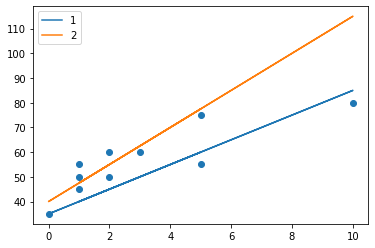

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

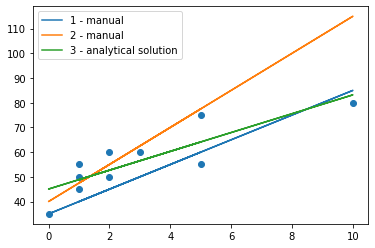

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.0625, 45.29125)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [108]:
n = X.shape[1]
alpha = 1e-2
# критерий сходимости
epsilon = 1e-4
W = np.array([1, 0.5])

new_err = np.inf
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    # ИЗМЕНЕНИЯ пока MSE > epsilon спускаемся по градиенту 
    if new_err - err > epsilon:
            new_err = err
            for k in range(W.shape[0]):
                W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
            if i % 10 == 0:
                alpha /= 0.9
                print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,3)}')
    else:
        break
print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,3)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.39629734 10.59023474], MSE = 725.726
Iteration #20: W_new = [11.43684431  9.90981467], MSE = 588.707
Iteration #30: W_new = [15.41441795  9.18872231], MSE = 468.53
Iteration #40: W_new = [19.28710767  8.48646999], MSE = 365.765
Iteration #50: W_new = [23.00244726  7.81275044], MSE = 280.422
Iteration #60: W_new = [26.50875969  7.17693474], MSE = 211.814
Iteration #70: W_new = [29.75787403  6.58775795], MSE = 158.62
Iteration #80: W_new = [32.70803445  6.05279184], MSE = 119.003
Iteration #90: W_new = [35.32678169  5.57792241], MSE = 90.79
Iteration #100: W_new = [37.59348534  5.16689065], MSE = 71.674
Iteration #110: W_new = [39.5011677   4.82096187], MSE = 59.421
Iteration #120: W_new = [41.05727646  4.53878553], MSE = 52.037
Iteration #130: W_new = [42.28315275  4.31649177], MSE = 47.883
Iteration #140: W_new = [43.21210

In [67]:
y_pred

array([35.18897384, 35.18897384, 42.03293184, 62.56480583, 48.87688983,
       28.34501584, 62.56480583, 96.78459583, 35.18897384, 42.03293184])

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [110]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    # ИЗМЕНЕНИЯ
    W -= alpha * (1/n * 2 * np.dot(X, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [90]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-3

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    # получаем предсказания
    y_pred = np.dot(W, X)
    # считаем градиент
    dQ = 2 / n * np.dot(X, y_pred - y)
    # получаем новые веса
    new_w = W - alpha * dQ
    # считаем расстояние между весами, насколько мы сделали большой шаг
    weight_dist = np.linalg.norm(new_w - W, ord=2)
    # считаем ошибку
    error = calc_mse(y, y_pred)
    print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    iter_num += 1
    W = new_w
    
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(error, 3)}')

Iter 0: error - 3047.75, weights: [2.08 4.27]
Iter 1: error - 1777.0353, weights: [2.9122 6.6934]
Iter 2: error - 1233.1246862399998, weights: [3.582352 8.242912]
Iter 3: error - 995.6119136616959, weights: [4.14613024 9.2253808 ]
Iter 4: error - 887.3532060945618, weights: [4.63968479 9.83998351]
Iter 5: error - 833.705103731704, weights: [ 5.08649208 10.21600803]
Iter 6: error - 803.2133893510011, weights: [ 5.50180176 10.43737578]
Iter 7: error - 782.6219704436712, weights: [ 5.89552318 10.55855991]
Iter 8: error - 766.3427039405008, weights: [ 6.27409912 10.61491815]
Iter 9: error - 752.0184356756685, weights: [ 6.64172205 10.62940003]
Iter 10: error - 738.6534565814403, weights: [ 7.0011236 10.6169007]
Iter 11: error - 725.8257570810141, weights: [ 7.35408709 10.58708704]
Iter 12: error - 713.3551043907684, weights: [ 7.70178013 10.54623222]
Iter 13: error - 701.1631838639862, weights: [ 8.04497059 10.49840646]
Iter 14: error - 689.2146678156332, weights: [ 8.38416679 10.44625003]

Iter 485: error - 44.08398624612522, weights: [44.5723719   3.90137717]
Iter 486: error - 44.08189393880794, weights: [44.57684183  3.90056662]
Iter 487: error - 44.07983962083911, weights: [44.58127099  3.89976346]
Iter 488: error - 44.077822602458426, weights: [44.58565977  3.89896762]
Iter 489: error - 44.0758422064293, weights: [44.59000851  3.89817905]
Iter 490: error - 44.07389776781149, weights: [44.5943176   3.89739766]
Iter 491: error - 44.07198863373792, weights: [44.59858739  3.8966234 ]
Iter 492: error - 44.07011416319536, weights: [44.60281824  3.8958562 ]
Iter 493: error - 44.06827372680928, weights: [44.6070105  3.895096 ]
Iter 494: error - 44.06646670663248, weights: [44.61116453  3.89434273]
Iter 495: error - 44.06469249593764, weights: [44.61528068  3.89359633]
Iter 496: error - 44.06295049901359, weights: [44.61935928  3.89285674]
Iter 497: error - 44.061240130965295, weights: [44.62340069  3.89212389]
Iter 498: error - 44.059560817517465, weights: [44.62740525  3.89